# Breast Cancer Coimbra

In [4]:
import pandas as pd
import ehrapy as ep
import numpy as np
import ehrdata as ed
import warnings
warnings.filterwarnings("ignore")

In [5]:
pd.set_option("display.max_columns", None)

## Getting the dataset

In [6]:
!wget -nc http://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv -O breast_cancer_coimbra.csv



7[Files: 0  Bytes: 0  [0 B/s] Re]87[http://archive.ics.uci.edu/ml/]87File 'breast_cancer_coimbra.csv' already there; not retrieving.
87breast_cancer_coimbr 100% [=============================>]   11.41K    --.-KB/s87HTTP response 200 OK [http://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv]
87breast_cancer_coimbr 100% [=============================>]   11.41K    --.-KB/s87[Files: 1  Bytes: 11.41K [15.70]8

# Data Wrangling

In [7]:
data = pd.read_csv("breast_cancer_coimbra.csv",
                   sep=",")

Change attribute name of "Classification" to "Class"

In [8]:
data = data.rename(columns={"Classification": "Class"})

Change Class attribute to (0, 1). 0=Healthy controls, 1=Patients.

In [9]:
data["Class"].replace((1, 2), (0, 1), inplace=True)

Since the dataset does not have a patient ID we add one.

In [10]:
data["patient_id"] = range(1, len(data) + 1)

In [11]:
data.set_index("patient_id", inplace=True)

In [12]:
data.to_csv("breast_cancer_coimbra_prepared.csv")

## ehrapy sanity check

In [13]:
adata = ep.io.read_csv("breast_cancer_coimbra_prepared.csv",
                   index_column="patient_id")

edata = ed.EHRData.from_adata(adata=adata)

! Feature 'Class' was detected as categorical features stored numerically.Please verify and correct using `ep.ad.replace_feature_types` if necessary.
! Feature types were inferred and stored in adata.var[feature_type]. Please verify using `ep.ad.feature_type_overview` and adjust if necessary using `ep.ad.replace_feature_types`.


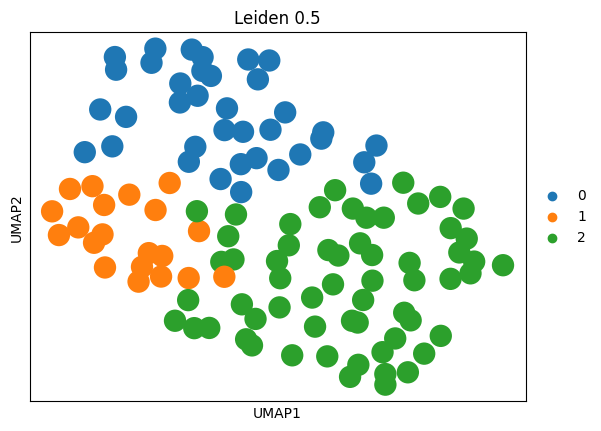

In [14]:
ep.pp.scale_norm(edata)
ep.pp.pca(edata)
ep.pp.neighbors(edata)
ep.tl.umap(edata)
ep.tl.leiden(edata, resolution=0.5, key_added="leiden_0_5")
ep.pl.umap(edata, color=["leiden_0_5"], title="Leiden 0.5")

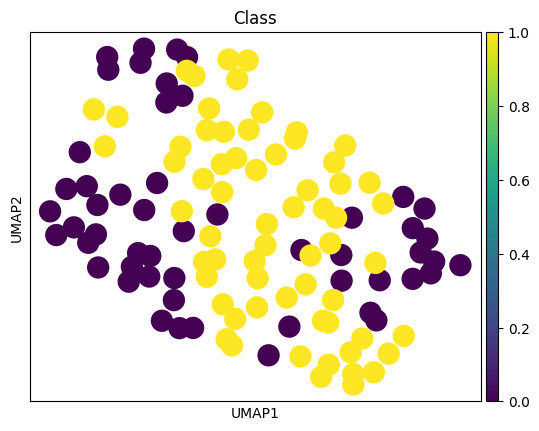

In [15]:
ep.pl.umap(edata, color=["Class"], ncols=1, wspace=0.75)